In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("/content/ai_job_dataset.csv")

# showing top 10 most common job titles

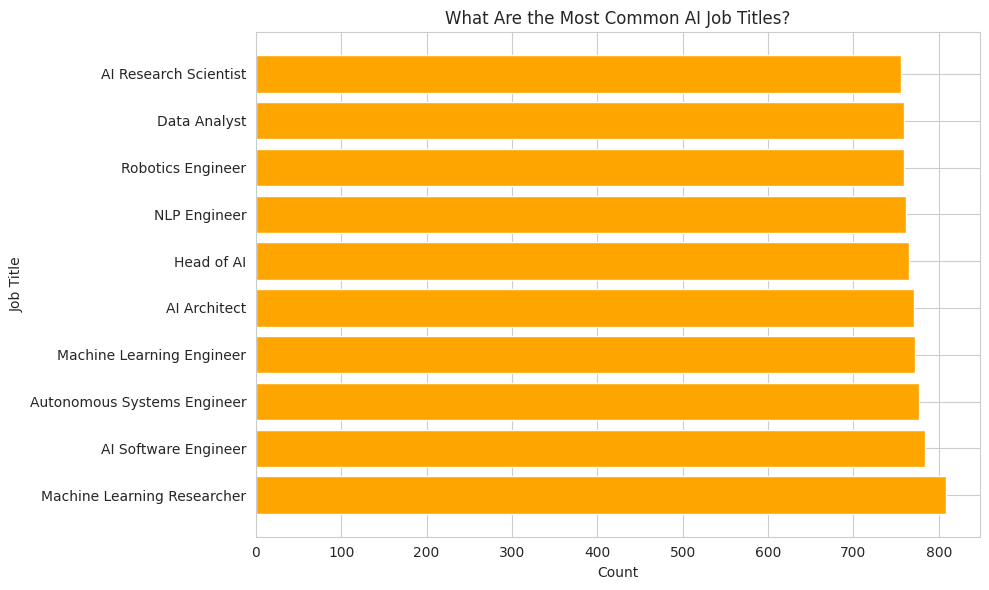

In [9]:
top_jobs = df['job_title'].value_counts().head(10)
plt.barh(top_jobs.index, top_jobs.values, color='orange')
plt.title("What Are the Most Common AI Job Titles?")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

# checking how salary is distributed

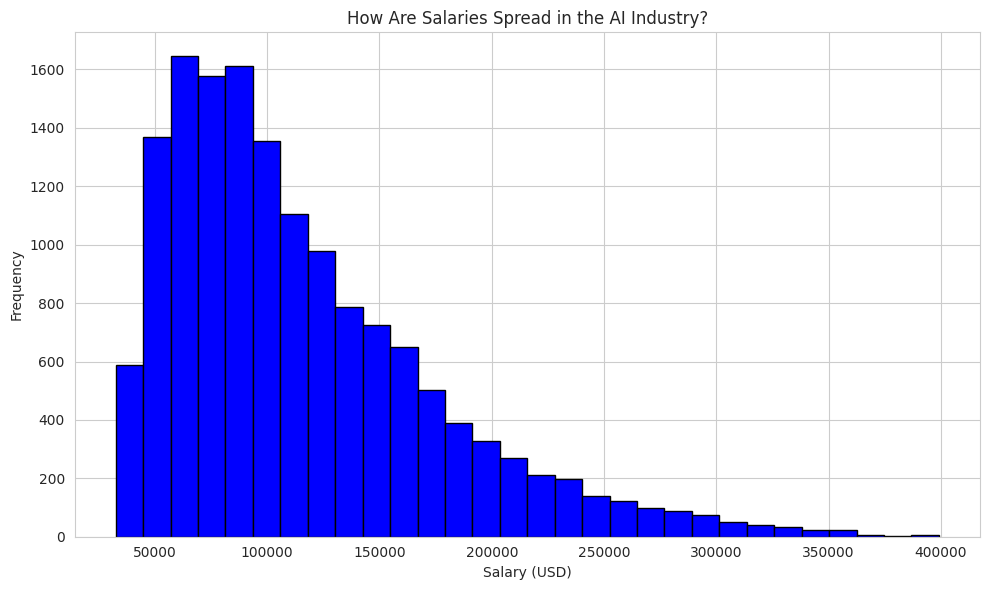

In [10]:
plt.hist(df['salary_usd'], bins=30, color='blue', edgecolor='black')
plt.title("How Are Salaries Spread in the AI Industry?")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# average salary for each experience level

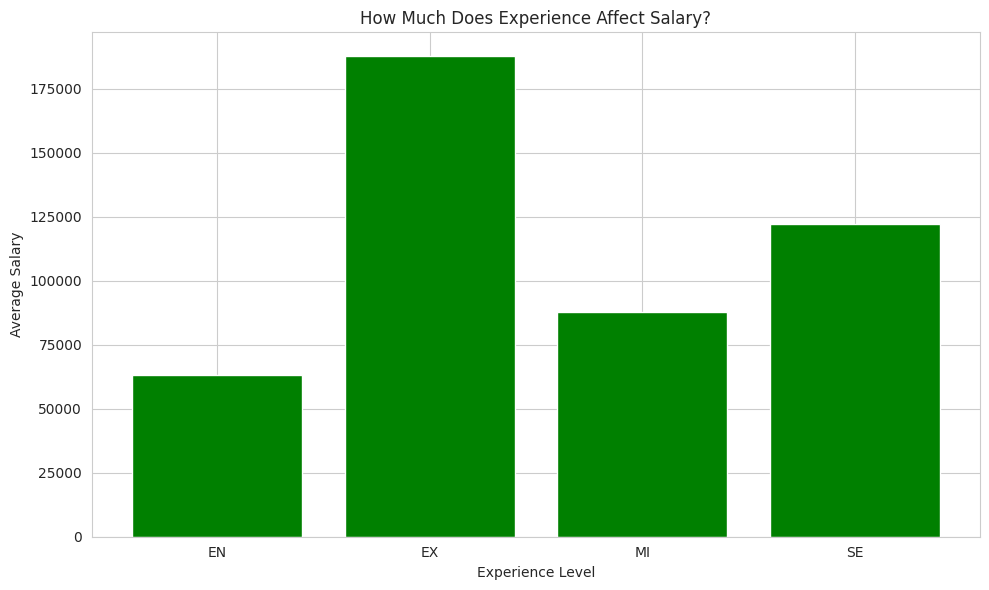

In [11]:
avg_salary_exp = df.groupby('experience_level')['salary_usd'].mean()
plt.bar(avg_salary_exp.index, avg_salary_exp.values, color='green')
plt.title("How Much Does Experience Affect Salary?")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.tight_layout()
plt.show()

# how many jobs offer remote work

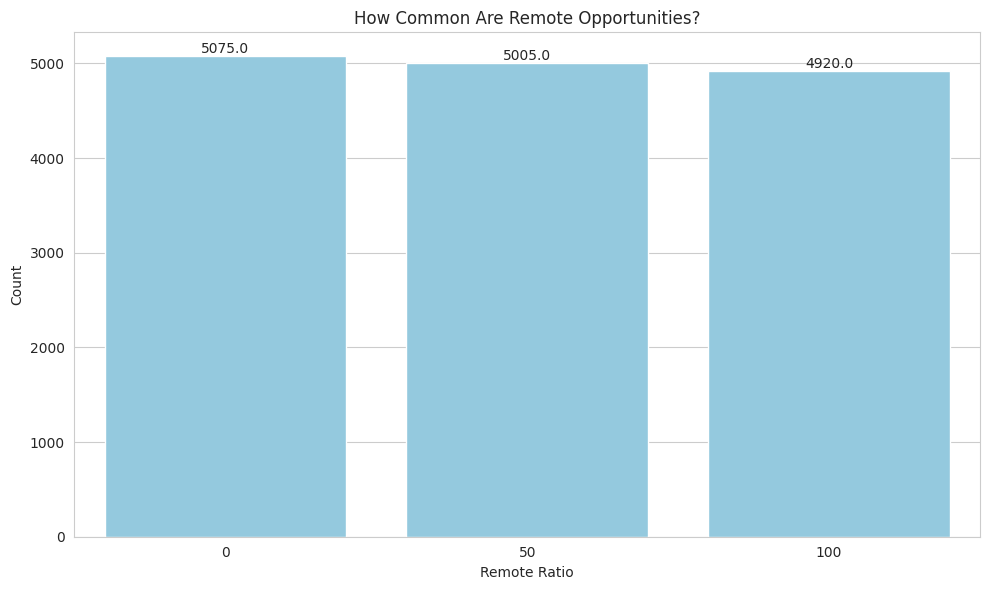

In [ ]:
sns.countplot(x='remote_ratio', data=df, color='skyblue')
plt.title("How Common Are Remote Opportunities?")
plt.xlabel("Remote Ratio")
plt.ylabel("Count")
plt.tight_layout()

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

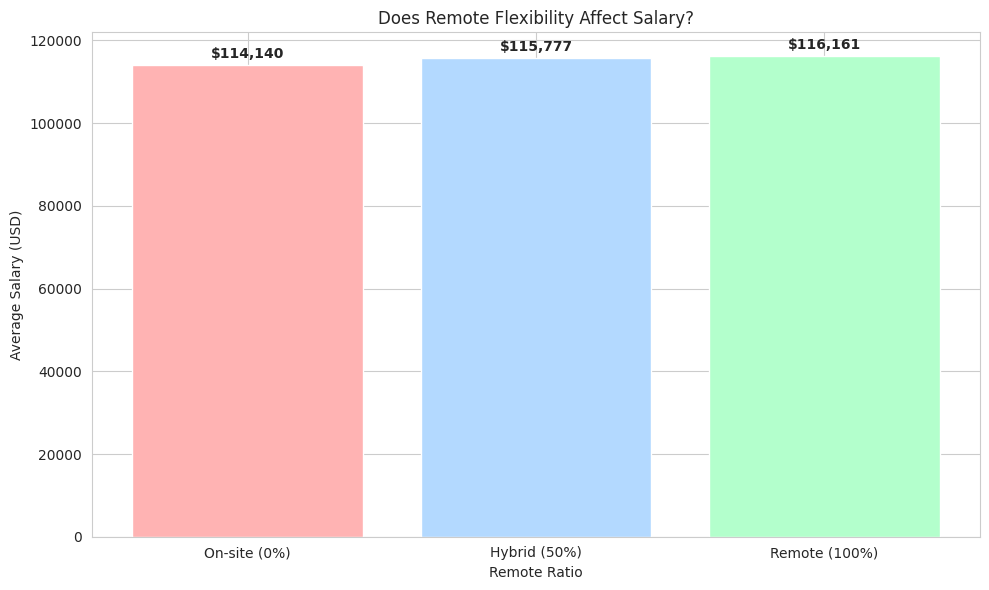

In [25]:
#  Is remote flexibility linked to better pay?

avg_salary_by_remote = df.groupby('remote_ratio')['salary_usd'].mean()
remote_labels_salary = ['On-site (0%)', 'Hybrid (50%)', 'Remote (100%)']

plt.bar(remote_labels_salary, avg_salary_by_remote.values, color=['#ffb3b3','#b3d9ff','#b3ffcc'])
plt.title("Does Remote Flexibility Affect Salary?")
plt.xlabel("Remote Ratio")
plt.ylabel("Average Salary (USD)")
for i, val in enumerate(avg_salary_by_remote.values):
    plt.text(i, val + 1000, f"${val:,.0f}", ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

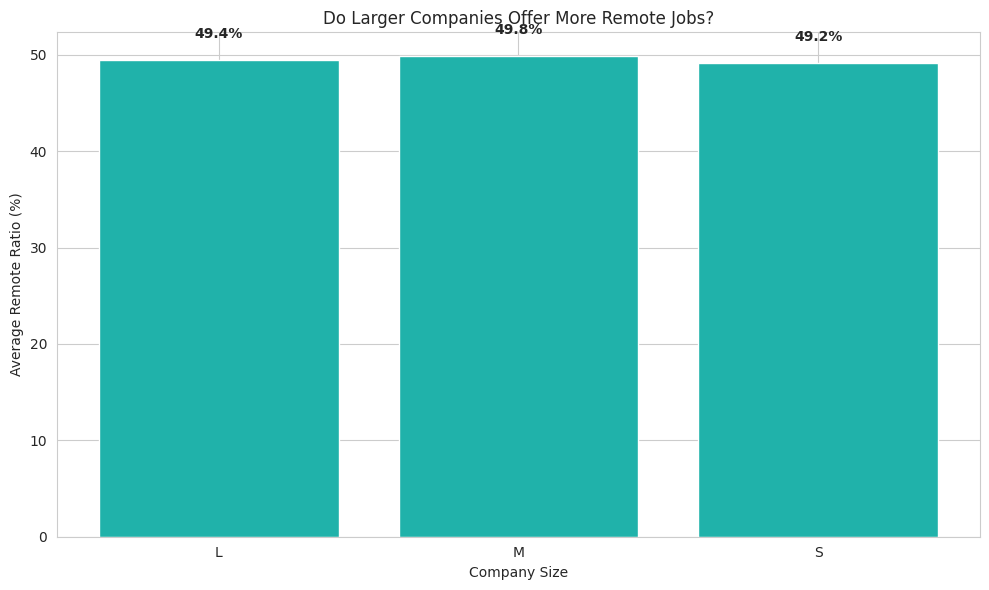

In [ ]:
# Which company sizes offer more remote jobs?

remote_by_size = df.groupby('company_size')['remote_ratio'].mean().sort_index()

plt.bar(remote_by_size.index, remote_by_size.values, color='lightseagreen')
plt.title("Do Larger Companies Offer More Remote Jobs?")
plt.xlabel("Company Size")
plt.ylabel("Average Remote Ratio (%)")
for i, val in enumerate(remote_by_size.values):
    plt.text(i, val + 2, f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()



# average salary based on company size

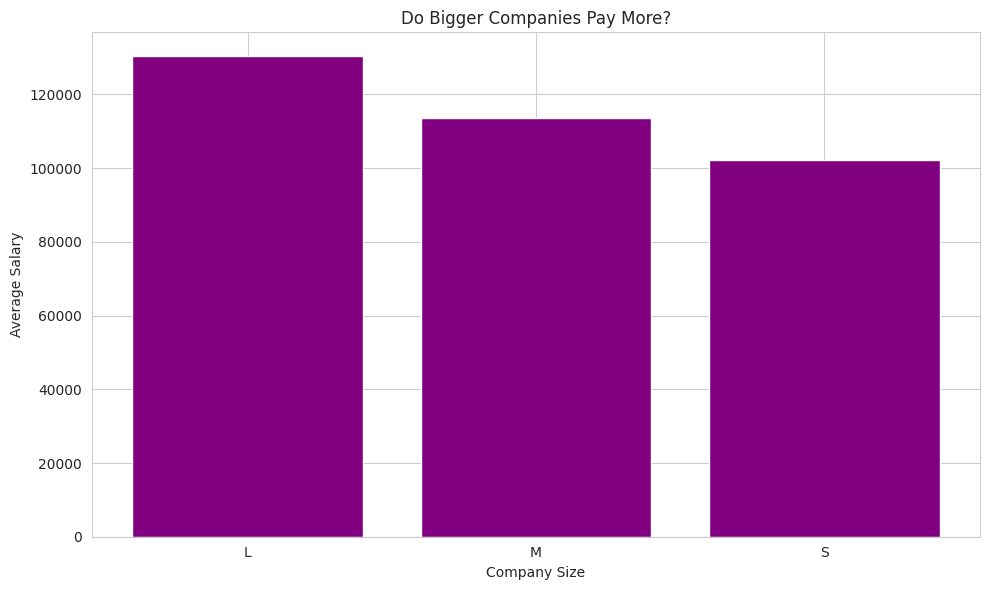

In [15]:
avg_salary_size = df.groupby('company_size')['salary_usd'].mean()
plt.bar(avg_salary_size.index, avg_salary_size.values, color='purple')
plt.title("Do Bigger Companies Pay More?")
plt.xlabel("Company Size")
plt.ylabel("Average Salary")
plt.tight_layout()
plt.show()

# showing most required skills

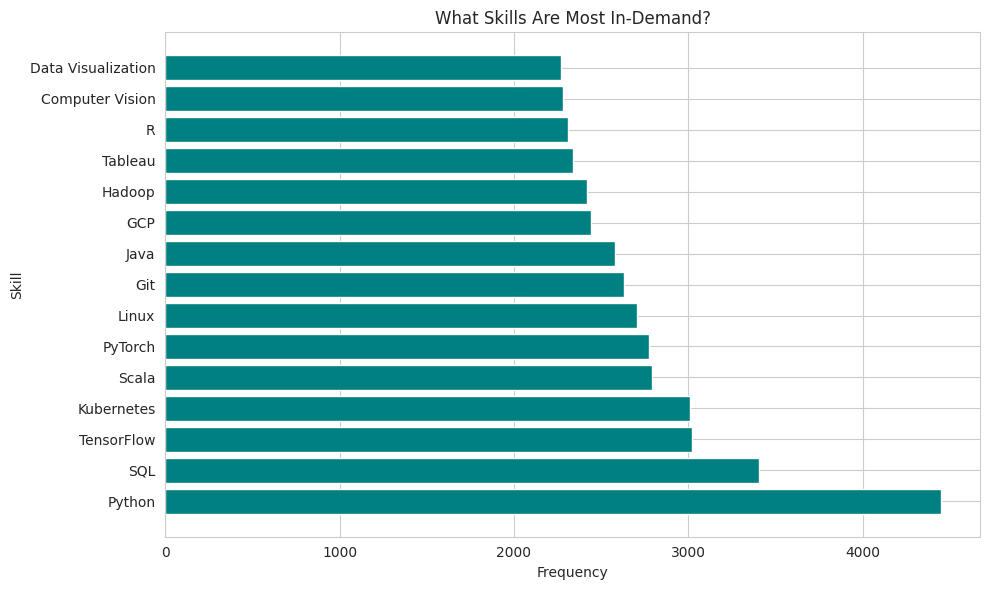

In [16]:
from collections import Counter
import numpy as np

skill_series = df['required_skills'].str.split(', ')
all_skills = skill_series.explode()
top_skills = pd.Series(Counter(all_skills)).sort_values(ascending=False).head(15)
plt.barh(top_skills.index, top_skills.values, color='teal')
plt.title("What Skills Are Most In-Demand?")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

# salary range for each employment type

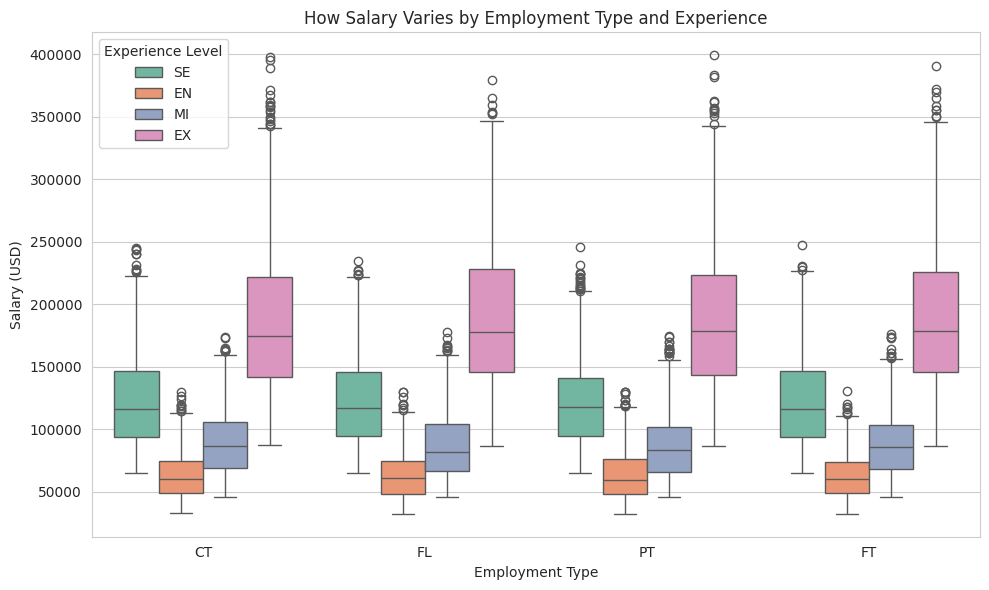

In [21]:
sns.boxplot(x='employment_type', y='salary_usd', data=df, hue='experience_level', palette='Set2')
plt.title("How Salary Varies by Employment Type and Experience")
plt.xlabel("Employment Type")
plt.ylabel("Salary (USD)")
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()

# showing how benefits and salary vary with experience

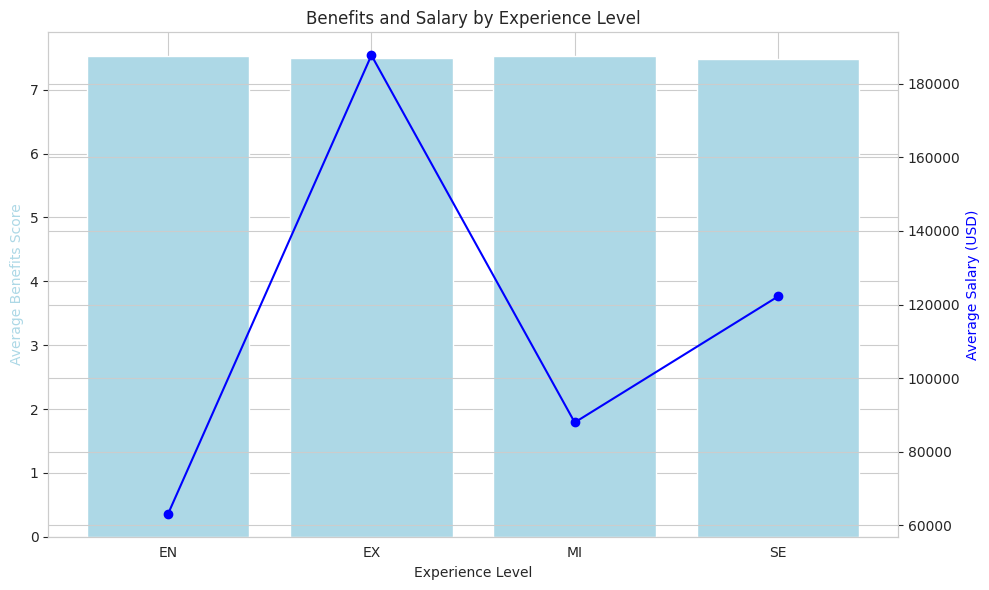

In [18]:
benefit_salary = df.groupby('experience_level')[['benefits_score', 'salary_usd']].mean()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(benefit_salary.index, benefit_salary['benefits_score'], color='lightblue')
ax2.plot(benefit_salary.index, benefit_salary['salary_usd'], color='blue', marker='o')
ax1.set_xlabel('Experience Level')
ax1.set_ylabel('Average Benefits Score', color='lightblue')
ax2.set_ylabel('Average Salary (USD)', color='blue')
plt.title("Benefits and Salary by Experience Level")
plt.tight_layout()
plt.show()